In [ ]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Polynomial regression


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In this exercise you will implement a method to estimate the model parameters of  $N$-th order polynomials and use the model to predict the price of a house (in Canadian dollars) based on its lot size (in square feet).
Suppose you want to buy a house in the City of Windsor, Canada. You contact a real-estate salesperson to get information about current house prices and receive details on 546 properties sold in Windsor in the last two years. You would like to figure out what the expected cost of a house might be given only the lot size of the house you want to buy. The dataset has an independent variable, `lotsize`
, specifying the lot size of a property and a dependent variable, `price`
, the sale price of a house. You will train the model on the dataset using polynomial regression.
A polynomial _model_ of order $N$ is defined by:

$$
f_\mathbf{w}(x) = \mathbf{w}_0 + \mathbf{w}_1 x + \mathbf{w}_2 x^2 + \dots + \mathbf{w}_N x^N,
$$

in which, the coefficients $\mathbf{w}_i$ are the model parameters. Note that $f_\mathbf{w}$ is linear with respect to the model parameters, i.e. if $x$ is fixed. Solving for the model parameters can be done by setting up the linear set of equations $A \mathbf{w} = y$. The full definition is

$$
\underbrace{\begin{bmatrix}
    1 & x_1 & x_1^2 & x_1^3 & \dots & x_1^N \\
    1 & x_2 & x_2^2 & x_2^3 & \dots & x_2^N \\
    1 & x_3 & x_3^2 & x_3^3 & \dots & x_3^N \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_m & x_m^2 & x_m^3 & \dots & x_m^N
\end{bmatrix}}_A
\times
\underbrace{\begin{bmatrix}
    \mathbf{w}_0 \\
    \mathbf{w}_1 \\
    \mathbf{w}_2 \\
    \mathbf{w}_3 \\
    \vdots \\
    \mathbf{w}_N
\end{bmatrix}}_\mathbf{w}
=
\underbrace{\begin{bmatrix}
    y_1 \\
    y_2 \\
    y_3 \\
    \vdots \\
    y_m
\end{bmatrix}}_y.
$$

The _loss_ $\ell$ for a single prediction is the squared error

$$
\ell(\hat{y}_i, y_i) = (\hat{y}_i-y_{i})^2,
$$

where $\hat{y}_i=f_{\mathbf{w}}(x_i)$ and $y_i$ is the label.
The linear least squares method minimizes the sum of squares. In other words, the parameters $\mathbf{w}$ can be decided by solving the following optimisation problem:

$$
\mathbf{w} = \underset{\mathbf{w}}{\operatorname{argmin}} \frac{1}{m}\sum_{i=1}^{m} \ell(\hat{y}_i, y_i) \quad\quad \text{(1)}
$$

In summary, the _model_ $f_w(x)$ is a polynomial in $x$ and the goal is to estimate the coefficients (model parameters $\mathbf{w}$) that minimize the average squared distance between predictions and labels. Projecting the vector of labels $\mathbb{y} = \begin{bmatrix} y_1\\y_2\\\vdots\\y_n \end{bmatrix}$ onto the column space of the design matrix defined by $A$ is equivalent to minimizing the mean squared error in Equation 1.
## Data exploration
The following cell loads the dataset and visualizes the data:


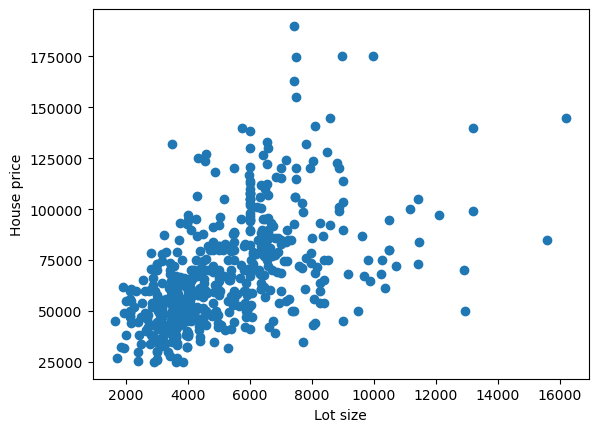

In [3]:
filename = "./data/simple_windsor.csv"
names = ["lotsize", "price"]
dataset = np.loadtxt(filename, delimiter=',').astype(np.int64)

X_full, y_full = dataset.T

plt.scatter(X_full, y_full)
plt.xlabel('Lot size')
plt.ylabel('House price');

The visualisation says a lot about the data.

---
**Task 1 (easy): Questions💡**
Notice the large spread in house prices for relatively similar lot sizes (vertically). 
1. In the cell below, list at least three reasons for the house price variability given the lot size.


---


In [4]:
## Write reasons here
# 1. It can be the build quality of the house
# 2. The placement
# 3. The age of the house

### Splitting into train and test data
The next cell splits the dataset into $80\%$ training data and $20\%$ test data using the _Scikit Learn_ library:


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

## Polynomial regression
The following exercise will guide you through the steps (1-4) for linear regression
1. Define a model, e.g. line or polynomial.
2. Identitfy knowns and uknowns.
3. Construct the design matrix $A$ for the input dataset (see the `get_design_matrix`
 function below).
4. Estimate the model parameters using linear least squares ([Task 2](#estimate)).

The function `get_design_matrix`
 (defined in the cell below) creates design matrices for polynomials of order $N$.


In [6]:
def get_design_matrix(x, order=1):
    """
    Get the coefficients of polynomial in a least square sense of order N.
    
    :param x: Must be numpy array of size (N).
    :order n: Order of Polynomial.
    """
    
    if order < 1 or x.ndim != 1:
        return x

    count = x.shape[0]
    matrix = np.ones((count, order + 1), np.float64)

    for i in range(1, order+1):
        matrix[:, i] = x**i

    return matrix


---
**Task 2 (medium): Estimate parameters👩‍💻**
Implement the function `estimate(X, y, order)`
 in the cell below to estimate the model parameters. Use `get_design_matrix(X, order)`
 to create the design matrix.

---


In [7]:
def estimate(X, y, order):
    """
    :param X: Input vector.
    :param y: Training data values.
    :param order: Order of the model to estimate.
    
    :return: Parameters of model.
    """
    
    wtf = get_design_matrix(X, order)

    return np.linalg.inv(wtf.T @ wtf) @ wtf.T @ y # TODO: What is this equation from?
    


---
**Task 3 (easy): Implement linear model👩‍💻**
Use the learned model parameters to predict house prices given an input vector $X$ of lot sizes. Implement the prediction function `predict(X, params)`
 in the cell below. 

---


In [8]:
def predict(X, w):
    """
    :param X: Input vector.
    :param w: Estimated parameters.
    
    :return: Predicted y-values.
    """

    res = []
    equ = w[0]

    for j in range(len(X)):
        equ = w[0]
        for i in range(1, len(w)):
            equ = equ + w[i] * (X[j]**i)
        
        res.append(equ)

    return res


---
**Task 4 (easy): Prediction👩‍💻**
In this task you will combine the functions above to learn the model parameters for a polynomial model and use it for making predictions of house prices. Implement the following steps in the code cell below (marked by `#`
).
1. Estimate model parameters from `X_train`
 and `y_train`
. 
2. Then calculate the predicted `y`
-values for the provided lot-sizes in the variable `values`
 in the cell below. 
3. Plot the predicted house prices as a line-plot.


---


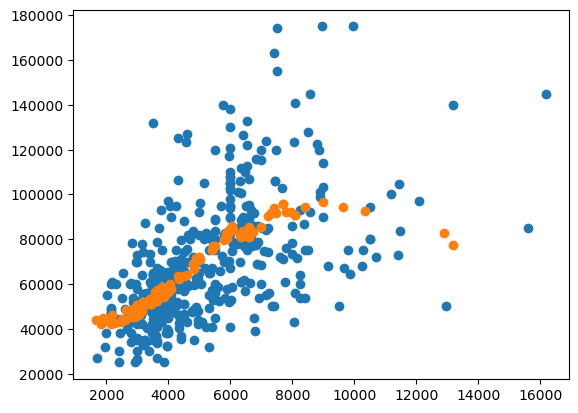

In [9]:
values = np.linspace(X_full.min(), X_full.max(), 50)

# (1) Estimate model parameters
w = estimate(X_train, y_train, 7)

# (2) Evaluate model
values = predict(X_test, w)

plt.scatter(X_train, y_train)

# (3) Plot predicted values
plt.scatter(X_test, values)


---
**Task 5 (medium): Order of Polynomial👩‍💻**
In this task you will experiment with the order of the polynomial model to investigate performance.
1. Increase the order of the polynomial and evaluate the results. Use    1. A $3$th-order polynomial.
    2. A $4$th-order polynomial.
    3. A $7$th-order polynomial.
    4. An $11$th-order polynomial.



Observe that the predictions deviate drastically from the actual lot sizes for the $7$th-order polynomial and above. 
1. Explain why this happens? _Hint: It has to do with the behavior of floating point numbers at extreme values._


---
The above problem can be solved by normalizing the input vectors. Normalization transforms (scales and translates) a series of input values to the interval $[0, 1]$ by using the minimum and maximum values of the inputs. 
The cell below provides helper functions for normalizing and denormalising (the inverse transformation) input vectors:


In [16]:
def normalized(X):
    n = (X - np.min(X_full))/np.max(X_full)
    return n

def denormalized(X):
    return X*np.max(X_full) + np.min(X_full)


---
**Task 6 (medium): Higher order polynomials with normalization👩‍💻**
In this task you will need to modify the code in [Task 4](#learn). Write your solution in the cell below.
1. Normalize the inputs in the variable `X_{train}`
 using `normalized`
 from the cell above. 
2. Re-train the model parameters using the normalized inputs. Use $3.$, $4.$, and $7.$ order polynomials as done in [Task 4](#learn).
3. Plot the results.


---


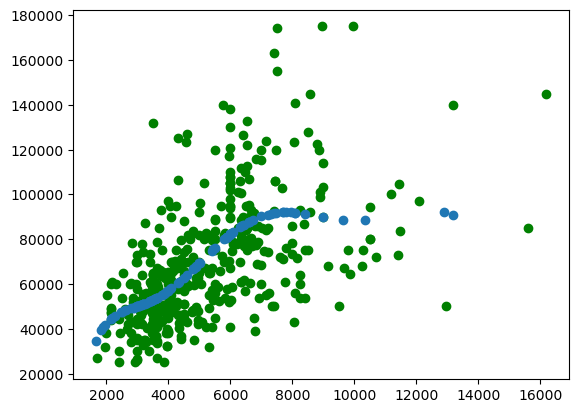

In [17]:
values = np.linspace(X_full.min(), X_full.max(), 50)

# (1) Normalize the inputs
X_normalized = normalized(X_train)
X_test_normalized = normalized(X_test)

# (2) Estimate parameters and predict y-values
params = estimate(X_normalized, y_train, 7)
values = predict(X_test_normalized, params)

plt.scatter(X_train, y_train, c="g")

# (3) Plot predicted values
plt.scatter(X_test, values)


---
**Task 7 (medium): Normalization improvement💡**
How much did the results improve for the different model orders? Explain why normalization achieves better performance. Write your answer in the cell below

---


In [ ]:
# Write your answer here

## Evaluation
The final step is to evaluate the models using the _root mean squarred error_ on unseen data (test data). The errors of the fitted models will be used to decide which model appears to be preferable.
The _root mean squared error_ is used because it calculates the average error in the same units as the house prices and is given by: 

$$
 \sqrt{\frac{1}{m}\sum_{i=1}^{m}(f_{\mathbf{w}}(x_{i})-y_{i})^2}
$$


---
**Task 8 (easy): Error calculation👩‍💻**
Implement the _root mean squared error_ in the `rmse`
 function below using the steps:
1. Normalize the `X`
 values using the `normalized`
 function
2. Predict the prices using the normalized `X`
 values and model parameters `w`

3. Calculate and return the _root mean squared error_ of the predicted values


---


In [25]:
def rmse(X, y, w):
    X_normalized = normalized(X)
    values = predict(X_normalized, w)
    res = 0

    for i in range(len(y)):
        res = res + (values[i]-y[i])**2

    return res / len(y)


---
**Task 9 (easy): Model evaluation👩‍💻**
In this task you will implement the function `evaluate_models`
 which must evaluate polynomial models of order 1 to 19 using the _root mean squared error_.  Your implementation should start at the `# Add code here`
 comment and do these steps
1. Estimate the model parameters using the `estimate`
 function.
2. Calculate the _root mean squared error_ of the train and test datasets, respectively.


---


In [23]:
def evaluate_models():
    """Calculates the RMS error for both training and test data for models with polynomial orders 
    from 1 to 19.
    
    Returns: (train losses, test losses)
    """
    losses_train = []
    losses_test = []
    for order in range(1, 19):
        # Add code here
        # first, estimate parameters
        params = estimate(X_train, y_train, order)
        rmse_train = rmse(X_train, y_train, params)
        rmse_test = rmse(X_test, y_test, params)
        losses_train.append(rmse_train)
        losses_test.append(rmse_test)
    return losses_train, losses_test


---
**Task 10 (easy): Plotting results👩‍💻**
1. Plot the training and test losses in the cell below. 
2. Explain why the test and train losses behave differently as the order of the polynomial increases.
3. What could be the consequence of using these models given that they have these properties. 


---


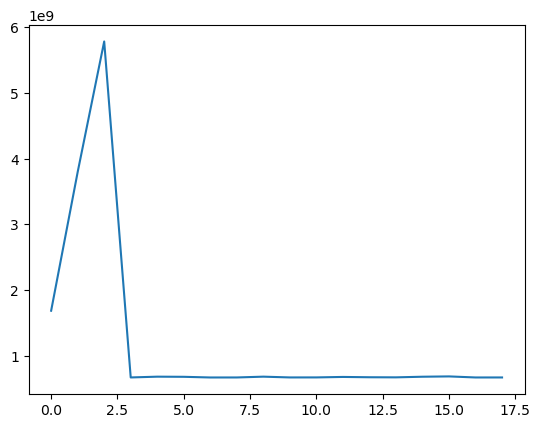

In [26]:
# Write your solution here
loss_train, loss_test = evaluate_models()
plt.plot(loss_test)


---
**Task 11 (medium): Reflection💡**
Explain whether it is possible and fair to improve the test loss to an arbitrarily low value using a different model or not.

---


In [ ]:
# Write your answers here